# Credit Card Fraud

Is this notebook I will test different methods on skwewed data.
I will apply different data science models and also I will try anomaly detection techniques.

In [61]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import pickle

sns.set(style='darkgrid')

import pylab as plot
# params = {'legend.fontsize': 12, 'axes.labelsize': 15, 'axes.titlesize': 15,'figure.figsize': [10, 7],
#           'legend.fontsize': 'medium', 'xtick.labelsize':'large', 'ytick.labelsize':'large'}
# plot.rcParams.update(params)

# Classifier Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import collections
from sklearn.pipeline import Pipeline 
from itertools import product


# Other Libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
# from imblearn.datasets import fetch_datasets
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from helper_functions import *

# 1. Load data and EDA 

In [4]:
df = pd.read_csv("../data/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This data has variables V1 to V28, Amount and Time. Class is what we want to predict.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum().max()

0

We do not have any nulls in this dataset

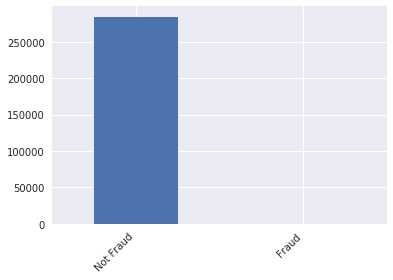

In [8]:
ax = df['Class'].value_counts().plot.bar()
ax.set_xticklabels(['Not Fraud', 'Fraud'], rotation=45, ha='right')
ax.xaxis.set_label_text('Class')
ax.xaxis.label.set_visible(False) # Change to False or True as needed

We can see that the majority class is No fraud, as we'd expect.
The data is extremely unbalanced.

In [9]:
print("{0}% of the dataset is Not Fraud".format(round(df['Class'].value_counts()[0]/len(df) * 100, 2)))
print("{0}% of the dataset is Fraud".format(round(df['Class'].value_counts()[1]/len(df) * 100, 2)))

99.83% of the dataset is Not Fraud
0.17% of the dataset is Fraud


For this dataset, accuracy score would not be the right metrics for evaluating the ML models. Using accuracy, I'd have a high accuracy however the model would be failing to classify Fraud .

Some appraches to this classification problem are:

• Collect more data - not possible in this case

• Change the performance metric:

    • Use Precision or Recall 
    
    • F1score (weighted average of precision recall)
    
    • Use Kappa (classification accuracy normalized by the imbalance of the classes in the data)

    • ROC curves - calculates sensitivity/specificity ratio.
    
• Resampling the dataset (process the data to have an approximate 50% ratio of each class):

    • OVER-sampling (addying copies of the undersampled class)
    
    • UNDER-sampling (deletes instances from the over-represented class)

In [10]:
# sns.pairplot(df, hue='Class');

In [11]:
# df.hist()

In [12]:
## Distribution of the data


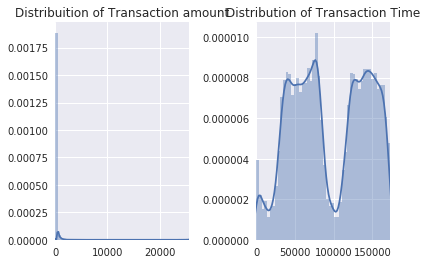

In [13]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df['Amount'].values, ax = ax[0])
ax[0].set_title('Distribuition of Transaction amount')
ax[0].set_xlim(min(df['Amount']), max(df['Amount']))
sns.distplot(df['Time'].values, ax=ax[1])
ax[1].set_xlim(min(df['Time'].values), max(df['Time'].values))
ax[1].set_title('Distribution of Transaction Time')
plt.subplots_adjust(wspace=0.5)

It looks like the variables V1 to V28 were normalised. Amount and Time variables need to be normalised as well.

In [14]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
df[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
df[df['Class'] == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

There are more transaction in which no fraud occured. The maximum amount in a fraudulent transaction is lower than the max amount in a non fraudulent transaction.

Text(0,0.5,'Number of Transactions')

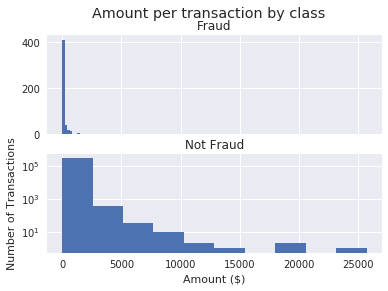

In [17]:
fig, ax = plt.subplots(2, 1, sharex = True)
fig.suptitle('Amount per transaction by class')
ax[0].hist(df[df['Class'] == 1]['Amount']);
ax[0].set_title('Fraud')
ax[1].hist(df[df['Class'] == 0]['Amount']);
ax[1].set_title('Not Fraud')
ax[1].set_yscale('log')
# ax[0].set_yscale('log')
# plt.subplots_adjust(wspace=0.5)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

The most frequent fraudulent transaction relates to lower amounts. It's obvious that the maximum fraudulent amount oer transaction is much lowed than the non fraudulent amount.

How does time and amount relate per CLass?

Text(0,0.5,'Amount')

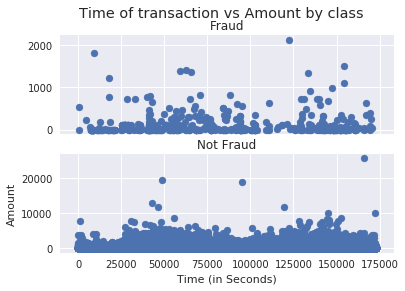

In [18]:
fig, ax = plt.subplots(2, 1, sharex = True)
fig.suptitle('Time of transaction vs Amount by class')
ax[0].scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount']);
ax[0].set_title('Fraud')
ax[1].scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount']);
ax[1].set_title('Not Fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

Time of transaction does not seem to matter.

In [19]:
robust_scaler = RobustScaler()

In [20]:
df['ScaleAmount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaledtime'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaleAmount,Scaledtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


How do the variables correlate?

In [21]:
corre_var = df.corr()

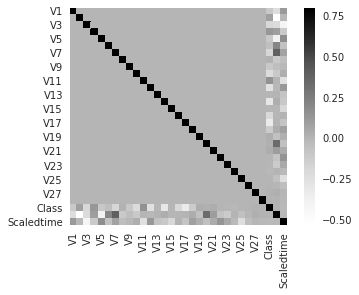

In [22]:
sns.heatmap(corre_var, vmax=0.8,square = True, cmap="Greys")

None of the V variables have correltaion to each other. Class have some positive correlation with some of the V variables.

# 2. Split the data into x and y

In [23]:
X = df.ix[:, df.columns != 'Class']
y = df.ix[:, df.columns == 'Class']

# 3. Resample data

How many records are "Fraud"?

In [24]:
len(df[df["Class"] == 1])

492

In [25]:
# len(df[df["Class"] == 0])

Undersample the majority class

In [26]:
x_under, y_under = undersample_maj_class(df[df["Class"] == 1], df[df["Class"] == 0], df)

In [27]:
y_under['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

# 4. Modelling

Train test split

In [28]:
X_train_under, X_test_under, y_train_under, y_test_under = data_prepration(x_under, y_under, test_size = 0.3)

Number of records train dataset:  688
Number of records test dataset:  296
Total number of records:  984


In [29]:
X_train, X_test, y_train, y_test = data_prepration(X, y, test_size = 0.3)

Number of records train dataset:  199364
Number of records test dataset:  85443
Total number of records:  284807


Base models

In [30]:
seed = 42
logreg = LogisticRegression(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
gboost = GradientBoostingClassifier(random_state=seed)
tree= DecisionTreeClassifier(random_state=seed)
linearSVC = LinearSVC(random_state=seed)
sgd = SGDClassifier(random_state=seed)
models = [logreg, rf, gboost, tree, linearSVC, sgd]

Checking models
CV results:
LogisticRegression: 0.917945 (+/- 0.038130)
CV results:
RandomForestClassifier: 0.897442 (+/- 0.035127)
CV results:
GradientBoostingClassifier: 0.912063 (+/- 0.036318)
CV results:
DecisionTreeClassifier: 0.900384 (+/- 0.036847)
CV results:
LinearSVC: 0.923828 (+/- 0.035498)
CV results:
SGDClassifier: 0.917988 (+/- 0.027571)


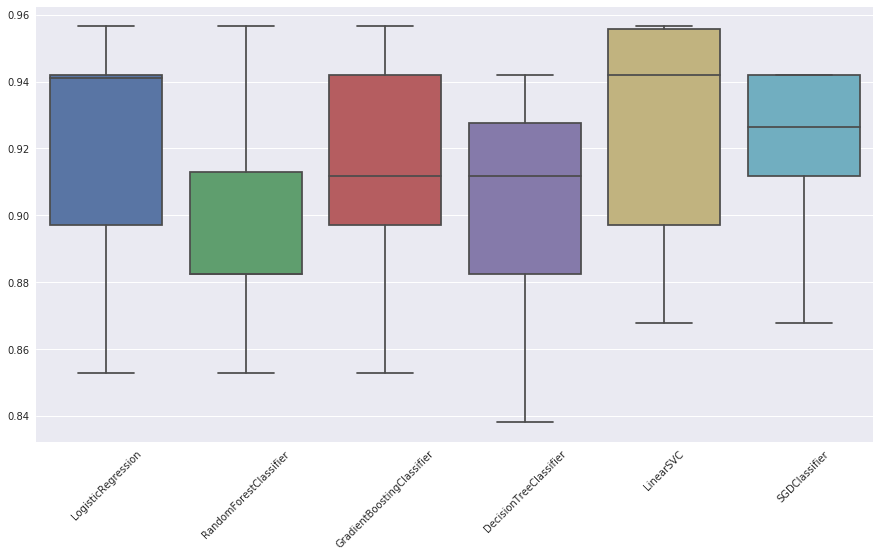

In [31]:
base_model(X_train_under, y_train_under, models, nsplits = 5)

HYperparameters tunning

In [32]:
parameter_grid_forest = {
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [100, 50, 10],
    'max_features': ['sqrt', 'auto', 'log2', None],
    'min_samples_split': [2, 3, 10],
    'bootstrap': [True, False]
}

In [147]:
parameter_grid_logisticregression = {
    'penalty': ['l2', 'l1'],
    'dual': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

In [34]:
parameter_grid_gbClassifier = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [200, 100, 50, 10],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_depth': [3, 4, 6, 8]
}

In [35]:
parameter_grid_tree = {
    'max_depth': [4, 6, 8, 10], 
    'min_samples_split': [2, 3, 4, 5],
    'max_features': ['sqrt', 'auto', 'log2', None]
}

In [82]:
parameter_grid_SVC = {
    'penalty': ['l2', 'l1']
}

In [37]:
parameter_grid_SGD = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', None, 'elasticnet'],
}

## 4.1 Random Forest

**Undersampled data**

In [38]:
clf_forest = model_hyperparam_tunning(
    X_train_under, y_train_under, "forest_undersampled", parameter_grid_forest,
    RandomForestClassifier(random_state = seed), nsplits = 5)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.3min


Best score: 0.9122145066317731
Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.6min finished


Metrics score is 99.71%
Recall metric in the testing dataset: 99.71%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       342

   micro avg       1.00      1.00      1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

Confusion Matrix 
 [[346   0]
 [  1 341]]


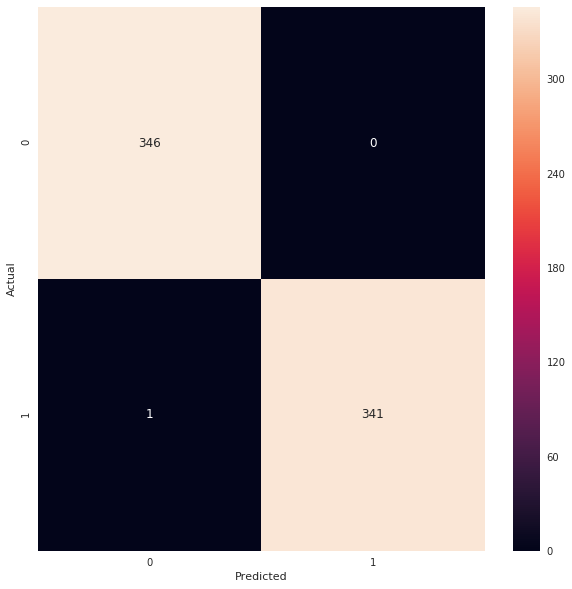

In [39]:
fit_predict_evaluate_model(clf_forest, X_train_under, y_train_under)

Wow!

**All data**

In [40]:
clf_forest_all = model_hyperparam_tunning(X_train, y_train, "forest_all",
                                      parameter_grid_forest,
                                      RandomForestClassifier(random_state = seed), 5)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 126.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 308.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 564.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 754.7min finished


Best score: 0.7781294300696247
Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


Metrics score is 83.99%
Recall metric in the testing dataset: 83.99%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      0.84      0.91       356

   micro avg       1.00      1.00      1.00    199364
   macro avg       1.00      0.92      0.96    199364
weighted avg       1.00      1.00      1.00    199364

Confusion Matrix 
 [[199008      0]
 [    57    299]]


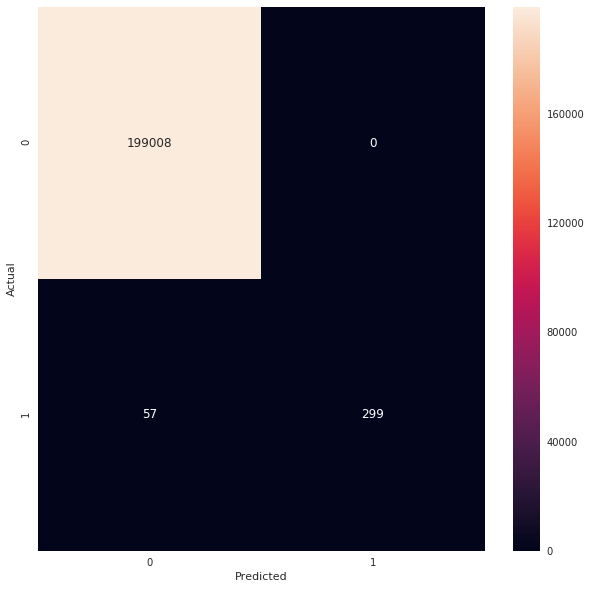

In [42]:
fit_predict_evaluate_model(clf_forest_all, X_train, y_train)

## 4.2 Linear SVC

**Undersampled data**

In [135]:
# it's necessary to skip forbidden parameter combinations when using linear SVC:
parameter_grid_SVC = [{'dual': [False], 'penalty': ['l1'], 'loss': ['squared_hinge']},
 {'dual': [True], 'penalty': ['l2'], 'loss': ['squared_hinge']},
                      {'dual': [False], 'penalty': ['l2'], 'loss': ['squared_hinge']},
 {'dual': [True], 'penalty': ['l2'], 'loss': ['hinge']}]

In [136]:
clf_linearSVC = model_hyperparam_tunning(
    X_train_under, y_train_under, "linearSVC_undersampled", parameter_grid_SVC,
    LinearSVC(random_state = seed), 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.923949287753524
Best parameters: {'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished


Metrics score is 92.98%
Recall metric in the testing dataset: 92.98%
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       346
           1       0.99      0.93      0.96       342

   micro avg       0.96      0.96      0.96       688
   macro avg       0.96      0.96      0.96       688
weighted avg       0.96      0.96      0.96       688

Confusion Matrix 
 [[344   2]
 [ 24 318]]


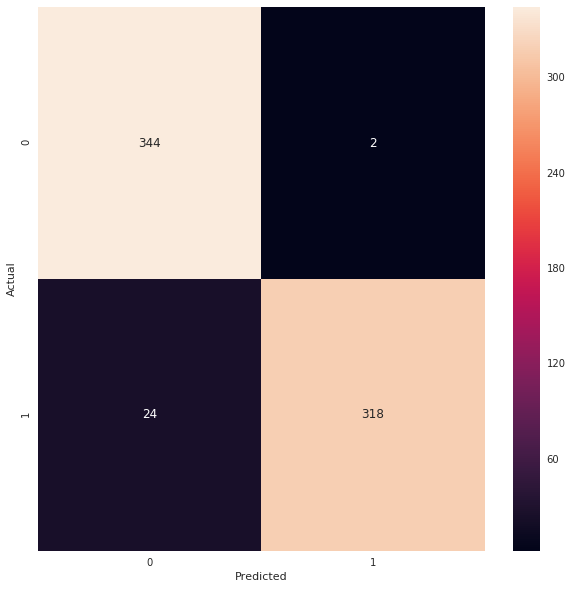

In [137]:
fit_predict_evaluate_model(clf_linearSVC, X_train_under, y_train_under)

**All data**

In [138]:
clf_linearSVC_all = model_hyperparam_tunning(X_train, y_train, "linearSVC_all",
                                      parameter_grid_SVC,
                                      LinearSVC(random_state = seed), 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.4min finished


Best score: 0.7809853997684468
Best parameters: {'dual': True, 'loss': 'hinge', 'penalty': 'l2'}


Metrics score is 78.93%
Recall metric in the testing dataset: 78.93%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.85      0.79      0.82       356

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.93      0.89      0.91    199364
weighted avg       1.00      1.00      1.00    199364

Confusion Matrix 
 [[198960     48]
 [    75    281]]


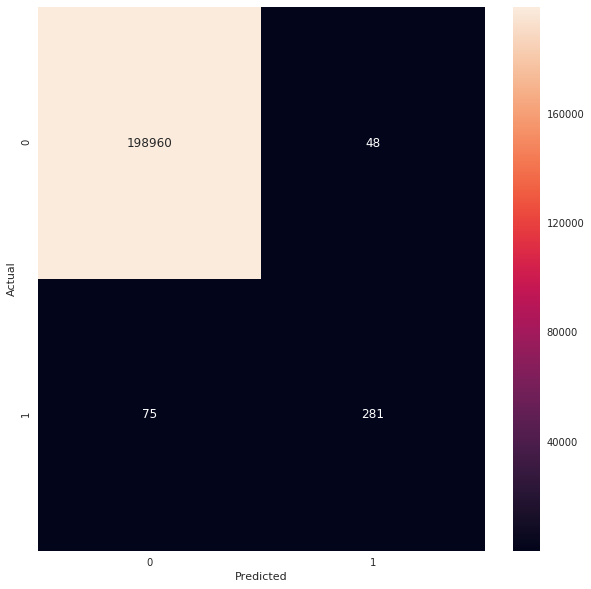

In [139]:
fit_predict_evaluate_model(clf_linearSVC_all, X_train, y_train)

## 4.3 Logistic Regression

**Undersampled data**

In [177]:
parameter_grid_logisticregression = [{'penalty': ['l2'], 'dual': [True, False] , 
                                     'solver': ['liblinear']}, 
                                     {'penalty': ['l2'], 'dual': [False] , 
                                     'solver': ['newton-cg']},
                                    {'penalty': ['l2'], 'dual': [False] , 
                                     'solver': ['lbfgs']},
                                    {'penalty': ['l2'], 'dual': [False] , 
                                     'solver': ['sag']},
                                    {'penalty': ['l2'], 'dual': [False] , 
                                     'solver': ['saga']},
                                    {'penalty': ['l1'], 'dual': [False] , 
                                     'solver': ['liblinear','saga']}]

In [178]:
clf_logisticRegression = model_hyperparam_tunning(
    X_train_under, y_train_under, "linearSVC_undersampled", parameter_grid_logisticregression,
    LogisticRegression(random_state = seed), 5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.9239279129245227
Best parameters: {'dual': False, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    2.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.2s finished


Metrics score is 92.69%
Recall metric in the testing dataset: 92.69%
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       346
           1       0.99      0.93      0.96       342

   micro avg       0.96      0.96      0.96       688
   macro avg       0.96      0.96      0.96       688
weighted avg       0.96      0.96      0.96       688

Confusion Matrix 
 [[342   4]
 [ 25 317]]


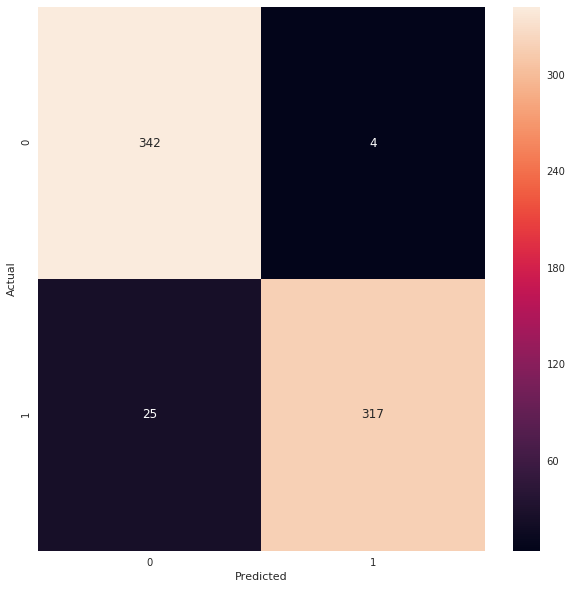

In [179]:
fit_predict_evaluate_model(clf_logisticRegression, X_train_under, y_train_under)

**All data**

In [180]:
clf_logisticRegression_all = model_hyperparam_tunning(
    X_train, y_train, "logisticRegression_all", parameter_grid_logisticregression,
    LogisticRegression(random_state = seed), 5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


Best score: 0.6545769596613005
Best parameters: {'dual': True, 'penalty': 'l2', 'solver': 'liblinear'}


Metrics score is 62.64%
Recall metric in the testing dataset: 62.64%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.87      0.63      0.73       356

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.94      0.81      0.86    199364
weighted avg       1.00      1.00      1.00    199364

Confusion Matrix 
 [[198976     32]
 [   133    223]]


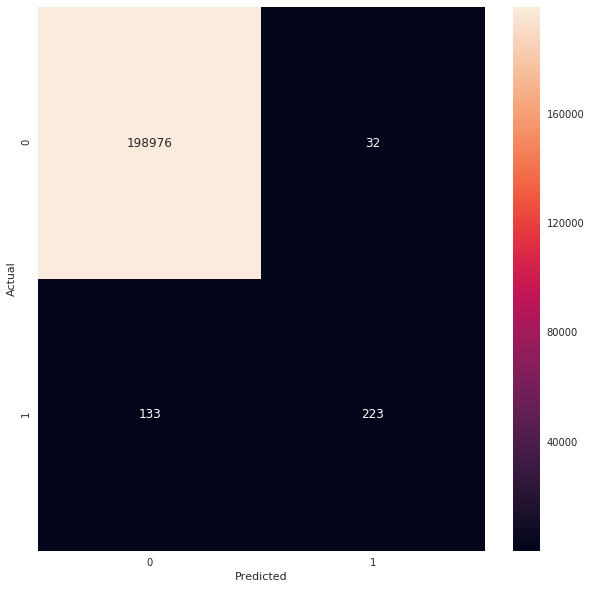

In [181]:
fit_predict_evaluate_model(clf_logisticRegression_all, X_train, y_train)